In [70]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# corr matrix
import seaborn as sns

In [63]:
data = pd.read_csv('../data/consumo_no23.csv', parse_dates=['FECHAPEDIDO'])

In [64]:
data.head()

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
0,B41691,2016-01-02,72714/16,400403,40,10,102.803729,411.214916,Compra menor,0-10-1,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
1,E64543,2016-01-02,71961/16,403770,20,5,12.100000,48.400000,Compra menor,0-4-111,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18
2,E65007,2016-01-02,72773/16,20415,100,50,215.325000,430.650000,Concurso,0-10-1,ALMACENABLE,APOSITO DE ESPUMA POLIURETANO / SACRO-11
3,E64911,2017-01-02,86159/17,20701,300,300,792.000000,792.000000,Concurso,0-6-1,ALMACENABLE,APOSITO C/ CARBON Y PLATA-6
4,E65509,2017-01-02,86264/17,161445.2,80,10,53.888999,431.111992,Concurso,0-0-2,ALMACENABLE,APOSITO DE FIBRAS DE POLIACRILATO-3


In [65]:
# Add column for total stack bought
data['STACKS_COMPRATS'] = data['CANTIDADCOMPRA']/data['UNIDADESCONSUMOCONTENIDAS']
data['STACKS_COMPRATS'] = data['STACKS_COMPRATS'].apply(lambda x: int(x))
# Separete ORIGIN column with regex
separated_origin = data['ORIGEN'].str.extract(r'(\d+)\D+(\d+)\D+(\d+)')
data['REGION'], data['HOSPITAL'], data['DEPARTMENT'] = separated_origin[0], separated_origin[1], separated_origin[2]
# Drop unnecessary columns
data.drop(['PRODUCTO', 'NUMERO','ORIGEN'], axis = 1, inplace = True)
# One hot encode the columns
data_ohe = pd.get_dummies(data, columns=['CODIGO', 'REFERENCIA','TIPOCOMPRA', 'TGL', 'REGION', 'HOSPITAL', 'DEPARTMENT'])
data_ohe.iloc[:, 6:] = data_ohe.iloc[:, 6:].astype('int')



In [69]:
data_ohe.head()

,FECHAPEDIDO,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,STACKS_COMPRATS,CODIGO_B40558,CODIGO_B41691,CODIGO_C26183,CODIGO_C56207,...,DEPARTMENT_90,DEPARTMENT_91,DEPARTMENT_92,DEPARTMENT_93,DEPARTMENT_94,DEPARTMENT_95,DEPARTMENT_96,DEPARTMENT_97,DEPARTMENT_98,DEPARTMENT_99
0,2016-01-02,40,10,102.803729,411.214916,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,20,5,12.100000,48.400000,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-02,100,50,215.325000,430.650000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-02,300,300,792.000000,792.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-02,80,10,53.888999,431.111992,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

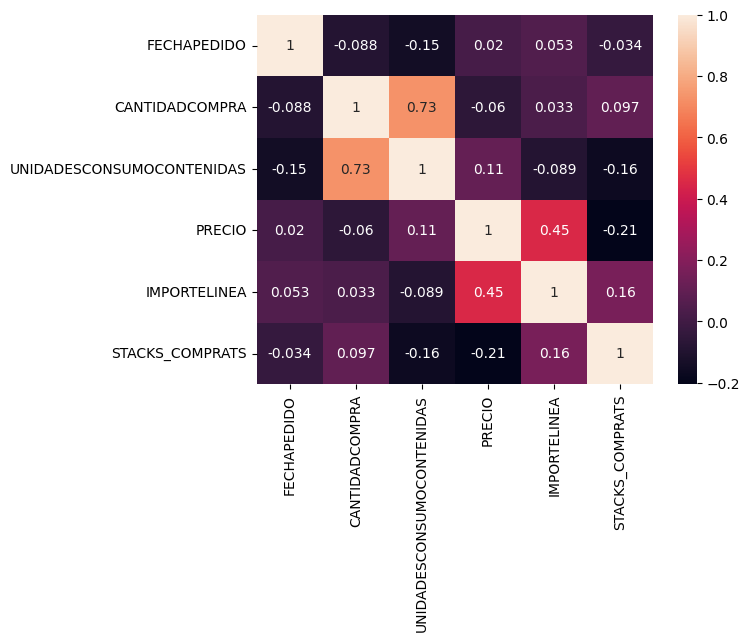

In [75]:
sns.heatmap(data_ohe.iloc[:, :6].corr(), annot=True)
# data_ohe.iloc[:, :6].corr()

In [24]:
data.groupby('ORIGEN').count()

,CODIGO,FECHAPEDIDO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,TGL,STACKS_COMPRATS
ORIGEN,,,,,,,,,,
0-0-13,25,25,25,25,25,25,25,25,25,25
0-0-18,2,2,2,2,2,2,2,2,2,2
0-0-2,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940
0-0-26,3,3,3,3,3,3,3,3,3,3
0-0-37,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...
1-2-175,1,1,1,1,1,1,1,1,1,1
1-2-59,33,33,33,33,33,33,33,33,33,33
1-2-60,2,2,2,2,2,2,2,2,2,2
